# Project: Wrangling and Analyze Data

### Introduction
Data wrangling refers to the process of cleaning, organising and enriching raw data so that it can be used for decision making promptly.
Data wrangling is so crucial because it’s the only way to make raw data usable
Data wrangling helps to improve data usability as it converts data into a compatible format for the end system. 
Through this project I will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it.

The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs.


### Gather

Gathering Data for this Project composed from three pieces of data as described below:
<br>
<li>The WeRateDogs Twitter archive. I will download this file manually by clicking the following link: <a href= "twitter_archive_enhanced.csv">twitter_archive_enhanced.csv</a></li><br>
<li>The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) hosted on Udacity's servers and would be downloaded programmatically using the Requests library and the following URL:<a href = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv">https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv</a></li><br>
<li>Each tweet's retweet count and favorite (i.e. "like") count at minimum, and any additional data I will find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, using tweet_json.txt(I was not able to successfully open a Twitter Deveeloper account) gotten from the resulting data from twitter_api.py.</li><br>
<li> I would then read this tweet_json.txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.</li>

In [1]:
# Import the libraries that will be needed in this project
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import re
import time
from nltk import pos_tag

In [2]:
# Read the twitter-archive-enhanced.csv file and store it as dataframe in tweets
df_archive = pd.read_csv('twitter-archive-enhanced.csv', encoding = 'utf-8')
# Quick check to the file content and structure
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [3]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### The file twitter-archive-enhanced.csv successfully stored in tweets dataframe, it has 17 columns and 2356 entries

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# Using Requests library to download a file then store it in a tsv file
url = ' https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)

with open(url.split('/')[-1], mode = 'wb') as outfile:
    outfile.write(response.content)

# Read the downloaded file into a dataframe 'df_images'
df_images = pd.read_csv('image-predictions.tsv', sep = '\t', encoding = 'utf-8')
# Quick check to the file content and structure
df_images.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# Using Requests library to download a file then store it in a tsv file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode = 'wb') as outfile:
    outfile.write(response.content)

# Read the downloaded file into a dataframe 'df_tweet'
df_tweet = pd.read_csv('tweet-json.txt', sep = '\t', encoding = 'utf-8')

In [6]:
# Save only certain tweet elements in dataframe
elements_to_save = ['id', 'favorite_count', 'retweet_count', 'created_at', 'full_text']
# Later convert list to dataframe
data = []

with open('tweet-json.txt', 'r') as readfile: 
    # Read in JSON line and convert to dict
    tweet_json = readfile.readline()
    
    # Read line by line into DataFrame
    while tweet_json:
        tweet_dict = json.loads(tweet_json)
        # Create a smaller dict
        data_row = dict((k, tweet_dict[k]) for k in elements_to_save)
        data.append(data_row)
        
        # Read in JSON line and convert to dict
        tweet_json = readfile.readline()
        
            
    
df_tweet = pd.DataFrame.from_dict(data)


## Assessing Data
After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues will be the next step. I will detect and document all quality issues and tidiness issues.
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### Dataset 1: WeRateDogs Twitter Archive

In [7]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
df_archive.shape

(2356, 17)

In [10]:
# Missing values

df_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [11]:
# Duplicated values:

df_archive.duplicated().sum()

0

In [12]:
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [13]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
df_archive.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Penny         10
Tucker        10
Lola          10
Bo             9
Winston        9
the            8
Sadie          8
an             7
Toby           7
Daisy          7
Bailey         7
Buddy          7
Bella          6
Oscar          6
Stanley        6
Dave           6
Jack           6
Jax            6
Rusty          6
Leo            6
Milo           6
Koda           6
Scout          6
Alfie          5
            ... 
Sora           1
Bruiser        1
Joshwa         1
Scruffers      1
Kingsley       1
Jeffri         1
Pilot          1
Kaiya          1
Jordy          1
Simba          1
Ashleigh       1
Humphrey       1
Robin          1
Superpup       1
Barry          1
Vixen          1
Comet          1
Pavlov         1
Clybe          1
Vinnie         1
Zeek           1
Mo             1
Billl          1
Daniel         1
Jessiga        1
Huxley         1
Jennifur       1
Margo         

In [16]:
df_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [17]:
df_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [18]:
df_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [19]:
df_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [20]:
# dogs that are both doggo and floofer

df_archive[(df_archive.doggo == "doggo") & (df_archive.floofer == "floofer")].shape

(1, 17)

In [21]:
# dogs that are both doggo and pupper

df_archive[(df_archive.doggo == "doggo") & (df_archive.pupper == "pupper")].shape

(12, 17)

In [22]:
# dogs that are both doggo and puppo

df_archive[(df_archive.doggo == "doggo") & (df_archive.puppo == "puppo")].shape

(1, 17)

In [23]:
# dogs that are both floofer and pupper


df_archive[(df_archive.floofer == "floofer") & (df_archive.pupper == "pupper")].shape

(0, 17)

In [24]:
# dogs that are both floofer and puppo

df_archive[(df_archive.floofer == "floofer") & (df_archive.puppo == "puppo")].shape

(0, 17)

In [25]:
# dogs that are both pupper and puppo

df_archive[(df_archive.pupper == "pupper") & (df_archive.puppo == "puppo")].shape

(0, 17)

#### Dataset 2: Image Predictions

In [26]:
df_images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [27]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
df_images.shape

(2075, 12)

In [29]:
df_images.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [30]:
#Duplicated values

df_images.duplicated().sum()

0

In [31]:
# view data types for jpg_url, p1, p2, p3

type(df_images.jpg_url[0]), type(df_images.p1[0]), type(df_images.p2[0]), type(df_images.p3[0])

(str, str, str, str)

In [32]:
df_images.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
Shetland_sheepdog             18
beagle                        18
Maltese_dog                   18
teddy                         18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [33]:
df_images.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
collie                             27
Pembroke                           27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
toy_terrier                        20
malinois                           20
chow                               20
miniature_pinscher                 20
Samoyed                            20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [34]:
df_images.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
Pomeranian                        29
toy_poodle                        29
Pekinese                          29
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
Pembroke                          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
L

In [35]:
print(df_images["p1_dog"].value_counts())
print(df_images["p2_dog"].value_counts())
print(df_images["p3_dog"].value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


#### Dataset 3: Tweet.json.txt data

In [36]:
df_tweet

,created_at,favorite_count,full_text,id,retweet_count
0,Tue Aug 01 16:23:56 +0000 2017,39467,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,8853
1,Tue Aug 01 00:17:27 +0000 2017,33819,This is Tilly. She's just checking pup on you....,892177421306343426,6514
2,Mon Jul 31 00:18:03 +0000 2017,25461,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,4328
3,Sun Jul 30 15:58:51 +0000 2017,42908,This is Darla. She commenced a snooze mid meal...,891689557279858688,8964
4,Sat Jul 29 16:00:24 +0000 2017,41048,This is Franklin. He would like you to stop ca...,891327558926688256,9774
5,Sat Jul 29 00:08:17 +0000 2017,20562,Here we have a majestic great white breaching ...,891087950875897856,3261
6,Fri Jul 28 16:27:12 +0000 2017,12041,Meet Jax. He enjoys ice cream so much he gets ...,890971913173991426,2158
7,Fri Jul 28 00:22:40 +0000 2017,56848,When you watch your owner call another dog a g...,890729181411237888,16716
8,Thu Jul 27 16:25:51 +0000 2017,28226,This is Zoey. She doesn't want to be one of th...,890609185150312448,4429
9,Wed Jul 26 15:59:51 +0000 2017,32467,This is Cassie. She is a college pup. Studying...,890240255349198849,7711


In [37]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
created_at        2354 non-null object
favorite_count    2354 non-null int64
full_text         2354 non-null object
id                2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3), object(2)
memory usage: 92.0+ KB


In [38]:
#rename column "id" to "tweet_id" for uniformity among the other dataset
df_tweet.rename(columns = {'id':'tweet_id'}, inplace = True)

In [39]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
created_at        2354 non-null object
favorite_count    2354 non-null int64
full_text         2354 non-null object
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3), object(2)
memory usage: 92.0+ KB


In [40]:
df_tweet.shape

(2354, 5)

In [41]:
#Check for duplicated rows

df_tweet.duplicated().sum()

0

### Quality issues

1.Remove null retweeted_status_id from the dataset

2.Delete the timestamp column from the merged dataset as I included the created_at column in the tweet_df dataframe,Separate created_at into day - month - year (3 separate columns) for making it simple and efficient.

3.Parse the column source to show the direct source (for ex: iphone, tweetdeck, etc.) rather than the HTML statement.

3.I found 1 dog that is both doggo and floofer, I found 12 dogs that are both doggo and pupper and I found 1 dog that is both doggo and puppo.

4.retweeted_status_id, retweeted_status_id, retweeted_status_user_id: I found 181 retweets. The retweets and the respective columns will be removed from the dataset.

5.p1, p2, p3: Some entries are lower case. also, some entries have underscore.

6.In the text, we can notice some decimal numbers for the ratings numerator part wrongly extracted.

7.Correct erroneous names 

8.Tweet_id, sources and img_num need to be converted into the right datatype


### Tidiness issues
1.Merging the three dataframes into one using tweet_id.


2.full_text: Some tweets reference more than one dog and include multiple stages and ratings. I will create a new column called stage to include the dog stage and delete the four columns. For tweets that reference multiple stages, the stage will include additional stages, such as: doggo|pupper, doggo|floofer, and doggo|puppo.


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [42]:
# Make copies of original pieces of data
df_archive = df_archive.copy()
df_images = df_images.copy()
df_tweet = df_tweet.copy()


#### Define:

Merge the three datasets using INNER Join

#### Code

In [43]:
# Merge the 3 dataframes based on the tweet_id column:

df_master = pd.merge(df_archive, df_images, how = 'inner', on = ['tweet_id'] )
df_master = pd.merge(df_master, df_tweet, how = 'inner', on = ['tweet_id'])
df_master.to_csv('master_tweet.csv', encoding = 'utf-8')

#### Test

In [44]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 32 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
jpg_url                       2073 

In [45]:
# Create a copy of the merged dataframe to work on and keep the original dataframe for reference

df_master = df_master.copy()

#### Define  

Delete null retweeted_status_id from the dataset

#### Code

In [46]:
# Delete retweets

df_master = df_master[pd.isnull(df_master.retweeted_status_id)]

#### Test

In [47]:
df_master.shape

(1994, 32)

#### Define

Delete the following columns:retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp, timestamp, text, in_reply_to_status_id, in_reply_to_user_id

#### Code

In [48]:
# Define a list of the columns to be dropped

drop_col = ['retweeted_status_id', 
            'retweeted_status_user_id', 
            'retweeted_status_timestamp', 
            'timestamp',
            'text',
            'in_reply_to_status_id',
            'in_reply_to_user_id']

df_master = df_master.drop(drop_col, 1)

#### Test

In [49]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 25 columns):
tweet_id              1994 non-null int64
source                1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bo

#### Define

Create Separate created_at into day - month - year (3 columns), then drop the created_at column

#### Code

In [50]:
# Convert `created_at` from object to datetime

df_master['created_at'] = pd.to_datetime(df_master['created_at'])

# Create new columns `date` and `time` based on `created_at`

#df_master['date'] = df_master['created_at'].dt.date
#df_master['time'] = df_master['created_at'].dt.time

In [51]:
# appending day, month, year values to new columns
df_master['day'] = df_master['created_at'].dt.day
df_master['month'] = df_master['created_at'].dt.month
df_master['year'] = df_master['created_at'].dt.year

In [52]:
# now we drop the unnecessary created_at column
df_master = df_master.drop('created_at', 1)

#### Test

In [53]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id              1994 non-null int64
source                1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bo

In [54]:
# Check the types of the date and time columns

#type (df_master.date[0]), type (df_master.time[0])

In [55]:
# Check the content of the date and time columns 
df_master[['day','month','year']].head(20)

,day,month,year
0,1,8,2017
1,1,8,2017
2,31,7,2017
3,30,7,2017
4,29,7,2017
5,29,7,2017
6,28,7,2017
7,28,7,2017
8,27,7,2017
9,26,7,2017


#### Define

Parse the column "source" to show the direct source (for ex: Tweeter for iPhone) rather than the full link.

#### Code

In [56]:
# Display the values in the source column

df_master.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1955
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [57]:
# Create a regular expression to extract the string between the tags: <> <>
df_master['source'] = df_master.source.str.extract('(<a href="https?)(:\/\/)(.+)(">)(.+)(<\/a)', 
                                                                       expand = True)[4];

In [58]:
# Change source to category

#df_master['source'] = df_master['source'].astype('category')

#### Test

In [59]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id              1994 non-null int64
source                1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bo

In [60]:
# test the parsing process

df_master.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

#### Define

Convert the type of tweet_id to string

#### Code

In [61]:
# Convert the types of the columns below to string


df_master['tweet_id'] = df_master['tweet_id'].astype('str')

In [62]:
df_master['source'] = df_master['source'].astype('category')

#### Test

In [63]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id              1994 non-null object
source                1994 non-null category
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null

#### Define

Check for null and duplicates after merging the datasets and drop retweet records from the dataset.


#### Code

In [64]:
# Check for Null values

df_master.isnull().sum()

tweet_id              0
source                0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
jpg_url               0
img_num               0
p1                    0
p1_conf               0
p1_dog                0
p2                    0
p2_conf               0
p2_dog                0
p3                    0
p3_conf               0
p3_dog                0
favorite_count        0
full_text             0
retweet_count         0
day                   0
month                 0
year                  0
dtype: int64

In [65]:
# Check for duplicates

df_master.duplicated().sum()

0

#### Test

In [66]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id              1994 non-null object
source                1994 non-null category
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null

#### Define

Change the content of columns p1, p2, p3 to capital letter and remove underscore

#### Code

In [67]:
# View the columns before the change

df_master[['p1','p2','p3']].head(10)

,p1,p2,p3
0,orange,bagel,banana
1,Chihuahua,Pekinese,papillon
2,Chihuahua,malamute,kelpie
3,paper_towel,Labrador_retriever,spatula
4,basset,English_springer,German_short-haired_pointer
5,Chesapeake_Bay_retriever,Irish_terrier,Indian_elephant
6,Appenzeller,Border_collie,ice_lolly
7,Pomeranian,Eskimo_dog,Pembroke
8,Irish_terrier,Irish_setter,Chesapeake_Bay_retriever
9,Pembroke,Cardigan,Chihuahua


In [68]:
# Replace underscore with space

df_master['p1'] = df_master.p1.str.replace('_',' ')
df_master['p2'] = df_master.p2.str.replace('_',' ')
df_master['p3'] = df_master.p3.str.replace('_',' ')

# Capitalize the content (every word) using title

df_master['p1'] = df_master.p1.str.title()
df_master['p2'] = df_master.p2.str.title()
df_master['p3'] = df_master.p3.str.title()

#### Test 

In [69]:
df_master[['p1','p2','p3']].head(10)

,p1,p2,p3
0,Orange,Bagel,Banana
1,Chihuahua,Pekinese,Papillon
2,Chihuahua,Malamute,Kelpie
3,Paper Towel,Labrador Retriever,Spatula
4,Basset,English Springer,German Short-Haired Pointer
5,Chesapeake Bay Retriever,Irish Terrier,Indian Elephant
6,Appenzeller,Border Collie,Ice Lolly
7,Pomeranian,Eskimo Dog,Pembroke
8,Irish Terrier,Irish Setter,Chesapeake Bay Retriever
9,Pembroke,Cardigan,Chihuahua


#### Define

Rectify ratings in numerator and denominators.

#### Code

In [70]:
# Using regex we try to find all occurences where there are more than one #/# in 'text' column
ratings_in_text = df_master[df_master.full_text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].full_text

ratings_in_text

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


616     "Yep... just as I suspected. You're not flossi...
825     This is Bookstore and Seaweed. Bookstore is ti...
876     After so many requests, this is Bretagne. She ...
967     Happy 4/20 from the squad! 13/10 for all https...
1001    This is Bluebert. He just saw that both #Final...
1017    Meet Travis and Flurp. Travis is pretty chill ...
1139    This is Socks. That water pup w the super legs...
1229    This may be the greatest video I've ever been ...
1234    Meet Oliviér. He takes killer selfies. Has a d...
1269    When bae says they can't go out but you see th...
1284    This is Eriq. His friend just reminded him of ...
1295    Meet Fynn &amp; Taco. Fynn is an all-powerful ...
1405    This is Darrel. He just robbed a 7/11 and is i...
1527    Meet Tassy &amp; Bee. Tassy is pretty chill, b...
1561    These two pups just met and have instantly bon...
1623    Meet Rufio. He is unaware of the pink legless ...
1627    Two gorgeous dogs here. Little waddling dog is...
1692    Meet E

In [71]:
for rate in ratings_in_text:
    mask = df_master['full_text'] == rate
    df_master.loc[mask, 'rating_numerator'] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", rate)
    df_master.loc[mask, 'rating_denominator'] = 10

In [72]:
df_master[df_master['full_text'].isin(ratings_in_text)]

,tweet_id,source,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,p2_dog,p3,p3_conf,p3_dog,favorite_count,full_text,retweet_count,day,month,year
616,777684233540206592,Twitter for iPhone,https://twitter.com/dog_rates/status/777684233...,11,10,None,None,None,None,None,...,True,Otterhound,0.110921,True,12518,"""Yep... just as I suspected. You're not flossi...",3403,19,9,2016
825,747600769478692864,Twitter for iPhone,https://twitter.com/dog_rates/status/747600769...,7,10,Bookstore,None,None,None,None,...,True,Labrador Retriever,0.043268,True,2545,This is Bookstore and Seaweed. Bookstore is ti...,619,28,6,2016
876,740373189193256964,Twitter for iPhone,https://twitter.com/dog_rates/status/740373189...,14,10,None,None,None,None,None,...,True,Labrador Retriever,0.023785,True,20648,"After so many requests, this is Bretagne. She ...",9220,8,6,2016
967,722974582966214656,Twitter for iPhone,https://twitter.com/dog_rates/status/722974582...,13,10,None,None,None,None,None,...,True,Weimaraner,0.085297,True,4493,Happy 4/20 from the squad! 13/10 for all https...,1764,21,4,2016
1001,716439118184652801,Twitter for iPhone,https://twitter.com/dog_rates/status/716439118...,11,10,Bluebert,None,None,None,None,...,True,Eskimo Dog,0.273419,True,2574,This is Bluebert. He just saw that both #Final...,247,3,4,2016
1017,714258258790387713,Twitter for iPhone,https://twitter.com/dog_rates/status/714258258...,8,10,Travis,None,None,None,None,...,True,Beagle,0.101294,True,3281,Meet Travis and Flurp. Travis is pretty chill ...,808,28,3,2016
1139,703356393781329922,Twitter for iPhone,https://twitter.com/dog_rates/status/703356393...,2,10,Socks,None,None,None,None,...,True,English Springer,0.003037,True,2085,This is Socks. That water pup w the super legs...,429,26,2,2016
1229,695064344191721472,Twitter for iPhone,https://twitter.com/dog_rates/status/695064344...,13,10,None,None,None,None,None,...,False,Ice Lolly,0.051774,False,1771,This may be the greatest video I've ever been ...,685,4,2,2016
1234,694352839993344000,Twitter for iPhone,https://twitter.com/dog_rates/status/694352839...,5,10,Oliviér,None,None,None,None,...,True,Silky Terrier,0.108404,True,2244,Meet Oliviér. He takes killer selfies. Has a d...,700,2,2,2016
1269,691483041324204033,Twitter for iPhone,https://twitter.com/dog_rates/status/691483041...,10,10,None,None,None,None,None,...,True,Gordon Setter,0.009826,True,2608,When bae says they can't go out but you see th...,656,25,1,2016


In [73]:
# Set correct numerators for specific tweets

df_master.loc[(df_master['tweet_id'] == 703356393781329922) & (df_master['rating_numerator'] == 2) , ['rating_numerator']] = 9.0
df_master.loc[(df_master['tweet_id'] == 694352839993344000) & (df_master['rating_numerator'] == 5) , ['rating_numerator']] = 10.0
df_master.loc[(df_master['tweet_id'] == 690400367696297985) & (df_master['rating_numerator'] == 6) , ['rating_numerator']] = 10.0
df_master.loc[(df_master['tweet_id'] == 674737130913071104) & (df_master['rating_numerator'] == 4) , ['rating_numerator']] = 10.0
df_master.loc[(df_master['tweet_id'] == 668537837512433665) & (df_master['rating_numerator'] == 1) , ['rating_numerator']] = 8.0
df_master.loc[(df_master['tweet_id'] == 667544320556335104) & (df_master['rating_numerator'] == 4) , ['rating_numerator']] = 10.0

#### Test

In [74]:
df_master.head(20)

,tweet_id,source,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,p2_dog,p3,p3_conf,p3_dog,favorite_count,full_text,retweet_count,day,month,year
0,892420643555336193,Twitter for iPhone,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,...,False,Banana,0.076110,False,39467,This is Phineas. He's a mystical boy. Only eve...,8853,1,8,2017
1,892177421306343426,Twitter for iPhone,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,...,True,Papillon,0.068957,True,33819,This is Tilly. She's just checking pup on you....,6514,1,8,2017
2,891815181378084864,Twitter for iPhone,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,...,True,Kelpie,0.031379,True,25461,This is Archie. He is a rare Norwegian Pouncin...,4328,31,7,2017
3,891689557279858688,Twitter for iPhone,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,...,True,Spatula,0.040836,False,42908,This is Darla. She commenced a snooze mid meal...,8964,30,7,2017
4,891327558926688256,Twitter for iPhone,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,...,True,German Short-Haired Pointer,0.175219,True,41048,This is Franklin. He would like you to stop ca...,9774,29,7,2017
5,891087950875897856,Twitter for iPhone,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,...,True,Indian Elephant,0.076902,False,20562,Here we have a majestic great white breaching ...,3261,29,7,2017
6,890971913173991426,Twitter for iPhone,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,...,True,Ice Lolly,0.193548,False,12041,Meet Jax. He enjoys ice cream so much he gets ...,2158,28,7,2017
7,890729181411237888,Twitter for iPhone,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,...,True,Pembroke,0.076507,True,56848,When you watch your owner call another dog a g...,16716,28,7,2017
8,890609185150312448,Twitter for iPhone,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,...,True,Chesapeake Bay Retriever,0.118184,True,28226,This is Zoey. She doesn't want to be one of th...,4429,27,7,2017
9,890240255349198849,Twitter for iPhone,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,...,True,Chihuahua,0.029248,True,32467,This is Cassie. She is a college pup. Studying...,7711,26,7,2017


#### Define

Correct erroneous names

#### Code

In [75]:
df_master.name.value_counts()

None        546
a            55
Charlie      11
Cooper       10
Lucy         10
Oliver       10
Penny         9
Tucker        9
Sadie         8
Winston       8
Daisy         7
Lola          7
Toby          7
the           7
Stanley       6
an            6
Bo            6
Bella         6
Jax           6
Koda          6
Dave          5
Buddy         5
Milo          5
Leo           5
Chester       5
Louis         5
Oscar         5
Scout         5
Bailey        5
Rusty         5
           ... 
Cuddles       1
Aldrick       1
Shawwn        1
Fillup        1
Daniel        1
Mo            1
Laela         1
Zeek          1
Harlso        1
Coopson       1
Angel         1
Harper        1
Ronnie        1
Rambo         1
Freddery      1
Grey          1
Klein         1
Simba         1
Ashleigh      1
Humphrey      1
Robin         1
Superpup      1
Butter        1
Vixen         1
Comet         1
Diogi         1
Jordy         1
Meyer         1
Clybe         1
Quinn         1
Name: name, Length: 936,

In [76]:
# Return tweets with names that start with lower case

df_master[df_master['name'].str.islower()][['tweet_id','full_text','name']]

,tweet_id,full_text,name
21,887517139158093824,I've yet to rate a Venezuelan Hover Wiener. Th...,such
50,881536004380872706,Here is a pupper approaching maximum borkdrive...,a
141,859196978902773760,We only rate dogs. This is quite clearly a smo...,quite
155,855459453768019968,"Guys, we only rate dogs. This is quite clearly...",quite
293,828650029636317184,"Occasionally, we're sent fantastic stories. Th...",one
438,806219024703037440,We only rate dogs. Please stop sending in non-...,incredibly
524,792913359805018113,Here is a perfect example of someone who has t...,a
647,772581559778025472,Guys this is getting so out of hand. We only r...,a
662,770655142660169732,We only rate dogs. Pls stop sending in non-can...,very
690,765395769549590528,This is my dog. Her name is Zoey. She knows I'...,my


In [77]:
# Create the following lists:

## list of tweet_ids where the name starts with lower case and the `full_text` column includes the string "name is":

lwrcase_name_is = df_master.loc[(df_master['name'].str.islower()) & (df_master['full_text'].str.contains('name is'))]['tweet_id'].tolist()

## list of tweet_ids where the name starts with lower case and the `full_text` column includes the string "named":

lwrcase_named = df_master.loc[(df_master['name'].str.islower()) & (df_master['full_text'].str.contains('named'))]['tweet_id'].tolist()

## list of tweet_ids where the name starts with lower case:

lwrcase = df_master.loc[(df_master['name'].str.islower())]['tweet_id'].tolist()


# Create a for loop that returns the word after the string "name is" and assigns it to column 'name'

for twt in lwrcase_name_is:
    text = df_master.full_text[df_master.tweet_id == twt].iloc[0]
    df_master.loc[df_master.tweet_id == twt,'name'] = re.findall("name is\s(\w+)", text)

# Create a for loop that returns the word after the string "name is" and assigns it to column 'name'

for twt in lwrcase_named:
    text = df_master.full_text[df_master.tweet_id == twt].iloc[0]
    df_master.loc[df_master.tweet_id == twt,'name'] = re.findall(r"named\s(\w+)", text)    

# Create a for loop that assigns "None" to column 'name'
for twt in lwrcase:
    text = df_master.full_text[df_master.tweet_id == twt].iloc[0]
    df_master.loc[df_master.tweet_id == twt,'name'] = "None"

#### Test

In [78]:
df_master.name.value_counts()

None        644
Charlie      11
Cooper       10
Lucy         10
Oliver       10
Tucker        9
Penny         9
Winston       8
Sadie         8
Toby          7
Lola          7
Daisy         7
Stanley       6
Bella         6
Jax           6
Koda          6
Bo            6
Oscar         5
Buddy         5
Louis         5
Chester       5
Scout         5
Dave          5
Rusty         5
Leo           5
Milo          5
Bailey        5
Larry         4
Dexter        4
Bentley       4
           ... 
Aldrick       1
Shawwn        1
Fillup        1
Carly         1
Asher         1
Jessiga       1
Daniel        1
Coopson       1
Robin         1
Angel         1
Harper        1
Ronnie        1
Rambo         1
Freddery      1
Grey          1
Simba         1
Ashleigh      1
Humphrey      1
Superpup      1
Billl         1
Butter        1
Vixen         1
Comet         1
Diogi         1
Jordy         1
Meyer         1
Clybe         1
Zeek          1
Mo            1
Quinn         1
Name: name, Length: 914,

#### Define

Change the value None in the column name to Null

#### Code

In [79]:
df_master['name'] = df_master['name'].replace('None',np.NaN)

#### Test

In [80]:
pd.isnull(df_master.name).sum()

644

#### Define

Create a new categorical column called stage to include the dog stages and delete the old 4 columns

#### Code

In [81]:
# Create the new column 

df_master['stage'] = df_master['full_text'].str.extract('(doggo|floofer|pupper|puppo)', expand=True)

In [82]:
# Create list of the tweet_ids where a tweet reference more than one dog stage: 

doggo_pupper = df_master.loc[(df_master.doggo == "doggo") & (df_master.pupper == "pupper")]['tweet_id'].tolist()
doggo_floofer = df_master.loc[(df_master.doggo == "doggo") & (df_master.floofer == "floofer")]['tweet_id'].tolist()
doggo_puppo = df_master.loc[(df_master.doggo == "doggo") & (df_master.puppo == "puppo")]['tweet_id'].tolist()

# update the `stage` for tweets that reference more than one stage
for twt in doggo_pupper:
    df_master.loc[df_master.tweet_id == twt,'stage'] = 'doggo|pupper'
    
for twt in doggo_floofer:
    df_master.loc[df_master.tweet_id == twt,'stage'] = 'doggo|floofer'
    
for twt in doggo_puppo:
    df_master.loc[df_master.tweet_id == twt,'stage'] = 'doggo|puppo'

In [83]:
# Convert the type of the new column `stage` to cateogy

df_master['stage'] = df_master['stage'].astype('category')

#### Test

In [84]:
df_master[(df_master.doggo == "doggo") & (df_master.pupper == "pupper")][['tweet_id','full_text',
                                                                                                        'stage',
                                                                                                        'doggo',
                                                                                                       'floofer',
                                                                                                       'pupper',
                                                                                                       'puppo']]

,tweet_id,full_text,stage,doggo,floofer,pupper,puppo
366,817777686764523521,"This is Dido. She's playing the lead role in ""...",doggo|pupper,doggo,None,pupper,None
429,808106460588765185,Here we have Burke (pupper) and Dexter (doggo)...,doggo|pupper,doggo,None,pupper,None
457,802265048156610565,"Like doggo, like pupper version 2. Both 11/10 ...",doggo|pupper,doggo,None,pupper,None
464,801115127852503040,This is Bones. He's being haunted by another d...,doggo|pupper,doggo,None,pupper,None
566,785639753186217984,This is Pinot. He's a sophisticated doggo. You...,doggo|pupper,doggo,None,pupper,None
722,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",doggo|pupper,doggo,None,pupper,None
780,751583847268179968,Please stop sending it pictures that don't eve...,doggo|pupper,doggo,None,pupper,None
871,741067306818797568,This is just downright precious af. 12/10 for ...,doggo|pupper,doggo,None,pupper,None
917,733109485275860992,"Like father (doggo), like son (pupper). Both 1...",doggo|pupper,doggo,None,pupper,None


In [85]:
df_master[(df_master.doggo == "doggo") & (df_master.floofer == "floofer")][['tweet_id','full_text',
                                                                                                        'stage',
                                                                                                        'doggo',
                                                                                                       'floofer',
                                                                                                       'pupper',
                                                                                                       'puppo']]

,tweet_id,full_text,stage,doggo,floofer,pupper,puppo
160,854010172552949760,"At first I thought this was a shy doggo, but i...",doggo|floofer,doggo,floofer,None,None


In [86]:
df_master[(df_master.doggo == "doggo") & (df_master.puppo == "puppo")][['tweet_id','full_text',
                                                                                                        'stage',
                                                                                                        'doggo',
                                                                                                       'floofer',
                                                                                                       'pupper',
                                                                                                       'puppo']]

,tweet_id,full_text,stage,doggo,floofer,pupper,puppo
154,855851453814013952,Here's a puppo participating in the #ScienceMa...,doggo|puppo,doggo,None,None,puppo


In [87]:
# Delete the original stage columns

drop_col = ['doggo', 
            'floofer', 
            'pupper', 
            'puppo']

df_master = df_master.drop(drop_col, 1)

In [88]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 24 columns):
tweet_id              1994 non-null object
source                1994 non-null category
expanded_urls         1994 non-null object
rating_numerator      1994 non-null object
rating_denominator    1994 non-null int64
name                  1350 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
favorite_count        1994 non-null int64
full_text             1994 non-null object
retweet_count         1994 non-null int64
day                   1994 non-null in

#### Define

Sort the dataframe columns

#### Code

In [89]:
# Create a list to re-sort the dataframe columns

sort_cols = ['tweet_id','full_text','name','stage','retweet_count', 'favorite_count',
 'source','rating_numerator', 'rating_denominator', 'img_num', 'p1', 'p1_conf', 'p1_dog',
 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog','day', 'month','year', 'expanded_urls', 'jpg_url']

df_master = df_master[sort_cols]

#### Test

In [90]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 24 columns):
tweet_id              1994 non-null object
full_text             1994 non-null object
name                  1350 non-null object
stage                 326 non-null category
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
source                1994 non-null category
rating_numerator      1994 non-null object
rating_denominator    1994 non-null int64
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
day                   1994 non-null int64
month                 1994 non-null in

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [91]:
df_master.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [92]:
#create a cpoy

df=df_master

In [93]:
df.head(10)

,tweet_id,full_text,name,stage,retweet_count,favorite_count,source,rating_numerator,rating_denominator,img_num,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,day,month,year,expanded_urls,jpg_url
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,8853,39467,Twitter for iPhone,13,10,1,...,0.085851,False,Banana,0.076110,False,1,8,2017,https://twitter.com/dog_rates/status/892420643...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,This is Tilly. She's just checking pup on you....,Tilly,NaN,6514,33819,Twitter for iPhone,13,10,1,...,0.090647,True,Papillon,0.068957,True,1,8,2017,https://twitter.com/dog_rates/status/892177421...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,4328,25461,Twitter for iPhone,12,10,1,...,0.078253,True,Kelpie,0.031379,True,31,7,2017,https://twitter.com/dog_rates/status/891815181...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,Darla,NaN,8964,42908,Twitter for iPhone,13,10,1,...,0.168086,True,Spatula,0.040836,False,30,7,2017,https://twitter.com/dog_rates/status/891689557...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,This is Franklin. He would like you to stop ca...,Franklin,NaN,9774,41048,Twitter for iPhone,12,10,2,...,0.225770,True,German Short-Haired Pointer,0.175219,True,29,7,2017,https://twitter.com/dog_rates/status/891327558...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg
5,891087950875897856,Here we have a majestic great white breaching ...,NaN,NaN,3261,20562,Twitter for iPhone,13,10,1,...,0.116317,True,Indian Elephant,0.076902,False,29,7,2017,https://twitter.com/dog_rates/status/891087950...,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,Jax,NaN,2158,12041,Twitter for iPhone,13,10,1,...,0.199287,True,Ice Lolly,0.193548,False,28,7,2017,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg
7,890729181411237888,When you watch your owner call another dog a g...,NaN,NaN,16716,56848,Twitter for iPhone,13,10,2,...,0.178406,True,Pembroke,0.076507,True,28,7,2017,https://twitter.com/dog_rates/status/890729181...,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg
8,890609185150312448,This is Zoey. She doesn't want to be one of th...,Zoey,NaN,4429,28226,Twitter for iPhone,13,10,1,...,0.193054,True,Chesapeake Bay Retriever,0.118184,True,27,7,2017,https://twitter.com/dog_rates/status/890609185...,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg
9,890240255349198849,This is Cassie. She is a college pup. Studying...,Cassie,doggo,7711,32467,Twitter for iPhone,14,10,1,...,0.451038,True,Chihuahua,0.029248,True,26,7,2017,https://twitter.com/dog_rates/status/890240255...,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 24 columns):
tweet_id              1994 non-null object
full_text             1994 non-null object
name                  1350 non-null object
stage                 326 non-null category
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
source                1994 non-null category
rating_numerator      1994 non-null object
rating_denominator    1994 non-null int64
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
day                   1994 non-null int64
month                 1994 non-null in

In [95]:
p1_count = df['p1'].value_counts().head(10)
p1_count

Golden Retriever      139
Labrador Retriever     95
Pembroke               88
Chihuahua              79
Pug                    54
Chow                   41
Samoyed                40
Pomeranian             38
Toy Poodle             38
Malamute               29
Name: p1, dtype: int64

In [96]:
sources_count = df['source'].value_counts()
sources_count

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [97]:
# most liked dog breed

dog_favorites = df.groupby('p1')['favorite_count'].sum().sort_values(ascending=False).head(10)
dog_favorites

p1
Golden Retriever      1696627
Labrador Retriever    1123850
Pembroke               994755
Chihuahua              676441
Samoyed                542991
French Bulldog         465738
Chow                   404241
Pug                    320223
Cocker Spaniel         315825
Pomeranian             299114
Name: favorite_count, dtype: int64

In [98]:
#most retweeted dog breed

dog_retweets = df.groupby('p1')['retweet_count'].sum().sort_values(ascending=False).head(10)
dog_retweets

p1
Golden Retriever      502096
Labrador Retriever    366682
Pembroke              280367
Chihuahua             220695
Samoyed               184922
French Bulldog        121782
Chow                  116361
Pomeranian            106518
Cocker Spaniel        100561
Pug                    99182
Name: retweet_count, dtype: int64

### Insights:
1.Most Popular Breed: The Golden Retriever is the most popular breed with the highest percentage of 21.68% among all breeds.

2.The Most Used Sources for Tweet: Twitter for iPhone is the most used source for tweet.

3.Most Popular Breed in terms of likes and retweets: In terms of likes and retweets, Golden Retriever breed is again the most popular.

4.Correlation between likes and retweets: There is a positive correlation between likes and retweets.

### Visualization

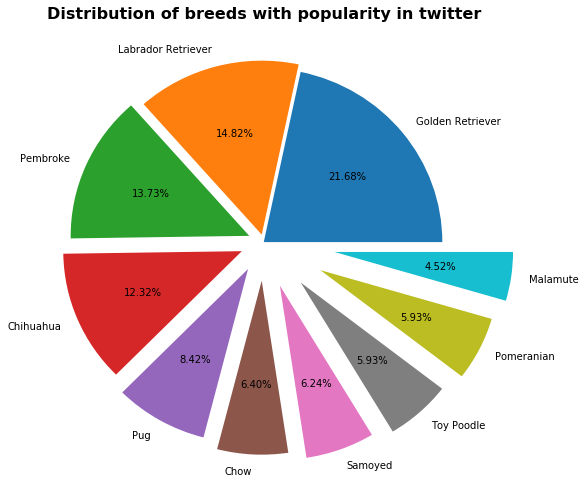

In [99]:
# Show the partition of the breeds with a pie chart.

explode = np.linspace(0,0.4,10)
p1_count.sort_values(ascending=False).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), explode=explode)
plt.ylabel('')
plt.title('Distribution of breeds with popularity in twitter', weight='bold', fontsize=16)
plt.savefig('breed_distribution.png')

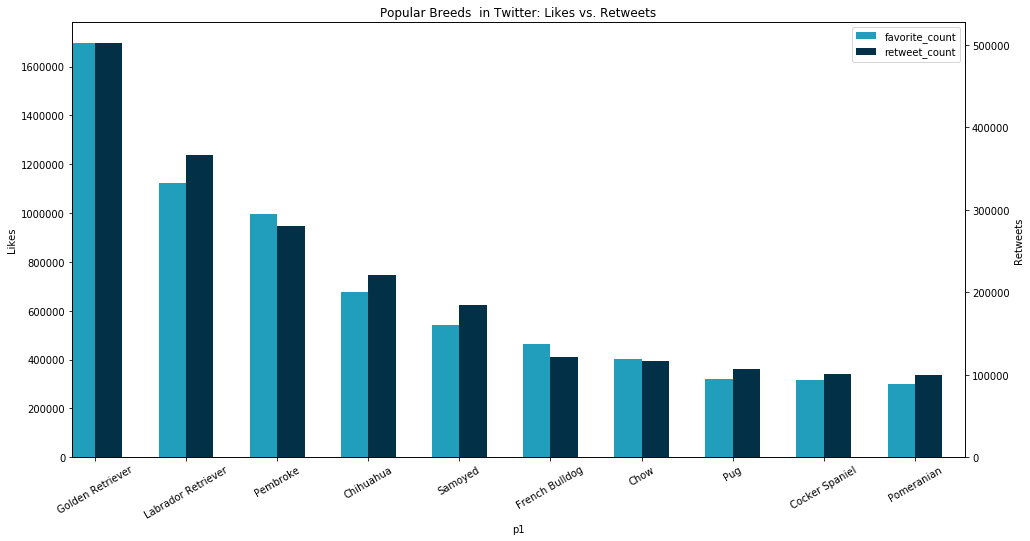

In [103]:
fig = plt.figure()
ax = fig.add_subplot(111) 
ax2 = ax.twinx()

width = 0.3

dog_favorites.plot(figsize = (16,8), kind='bar', color='#219ebc', ax=ax, width=width, position=1, title='Popular Breeds  in Twitter: Likes vs. Retweets')
dog_retweets.plot(figsize = (16,8), kind='bar', color='#023047', ax=ax2, width=width, position=0)

ax.grid(False)
ax2.grid(False)

ax.set_ylabel('Likes')
ax2.set_ylabel('Retweets')

ax.set_xticklabels(dog_favorites.index, rotation=30)

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=1)
plt.show()
plt.savefig('popular_breeds.png')

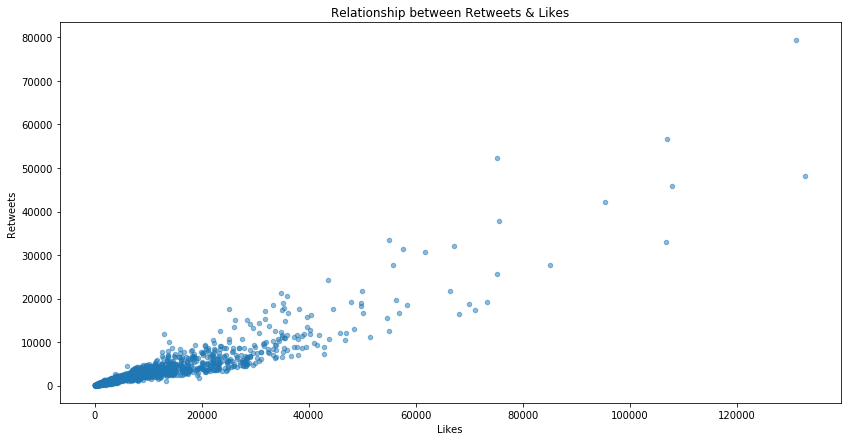

In [101]:
x = df.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', figsize = (14,7), alpha = 0.5)
x.grid(False)
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.title('Relationship between Retweets & Likes')
plt.savefig('likes&retweets.png')

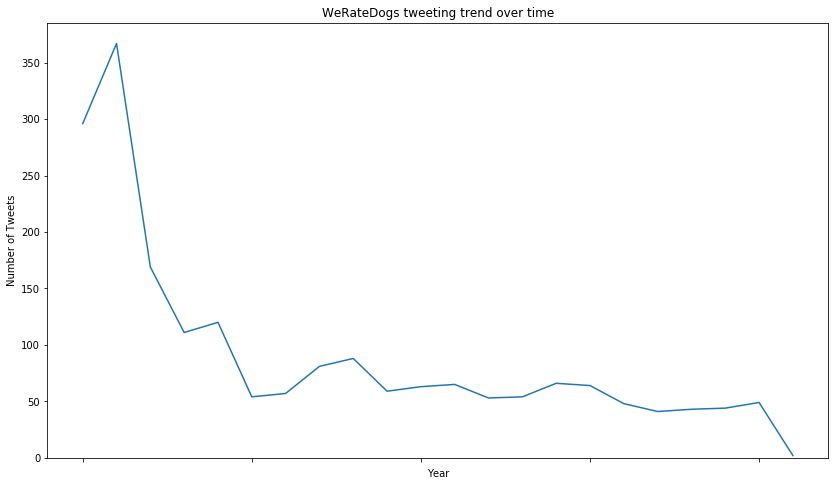

In [102]:
data = df['tweet_id'].groupby([df["year"], df["month"]]).count()
ax = data.plot('line', title='WeRateDogs tweeting trend over time', figsize = (14,8))
ax.set_xlabel("Year")
ax.set_ylabel("Number of Tweets")
ax.set_ylim(0, )
plt.savefig('tweet_trend.png')